In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,roc_curve,precision_score,recall_score
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)

In [2]:
data=pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
data.shape


(28382, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
customer_id                       28382 non-null int64
vintage                           28382 non-null int64
age                               28382 non-null int64
gender                            27857 non-null object
dependents                        25919 non-null float64
occupation                        28302 non-null object
city                              27579 non-null float64
customer_nw_category              28382 non-null int64
branch_code                       28382 non-null int64
days_since_last_transaction       25159 non-null float64
current_balance                   28382 non-null float64
previous_month_end_balance        28382 non-null float64
average_monthly_balance_prevQ     28382 non-null float64
average_monthly_balance_prevQ2    28382 non-null float64
current_month_credit              28382 non-null float64
previous_month_credit             28382 non-null

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,28382.0,15143.508667,8746.454456,1.00,7557.2500,15150.500,22706.7500,30301.00
vintage,28382.0,2364.336446,1610.124506,180.00,1121.0000,2018.000,3176.0000,12899.00
age,28382.0,48.208336,17.807163,1.00,36.0000,46.000,60.0000,90.00
dependents,25919.0,0.347236,0.997661,0.00,0.0000,0.000,0.0000,52.00
city,27579.0,796.109576,432.872102,0.00,409.0000,834.000,1096.0000,1649.00
customer_nw_category,28382.0,2.225530,0.660443,1.00,2.0000,2.000,3.0000,3.00
branch_code,28382.0,925.975019,937.799129,1.00,176.0000,572.000,1440.0000,4782.00
days_since_last_transaction,25159.0,69.997814,86.341098,0.00,11.0000,30.000,95.0000,365.00
current_balance,28382.0,7380.551804,42598.711923,-5503.96,1784.4700,3281.255,6635.8200,5905904.03
previous_month_end_balance,28382.0,7495.770548,42529.345225,-3149.57,1906.0000,3379.915,6656.5350,5740438.63


In [6]:
#let see columns where we have missing values
data.isnull().sum()# gender,dependants,occupation,city,days_since_last_transaction

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [7]:
data.gender.value_counts() # both classes are reasonably similiar so we create a new one to fill the missing values, do not use mode in thsi case

Male      16548
Female    11309
Name: gender, dtype: int64

In [8]:
data['gender']=data['gender'].map({'Male':0,'Female':1,np.nan:-1})

In [9]:
#data.drop('gender_',axis=1,inplace=True)#becasue created earlier a column named gender_ and replaced with gender

### CITY , OCCUPATION,DEPENDENTS filling missing values using MODE

In [10]:
data['city'].value_counts().head()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
Name: city, dtype: int64

In [11]:
data['occupation'].value_counts().head()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [12]:
data['dependents'].value_counts().head()

0.0    21435
2.0     2150
1.0     1395
3.0      701
4.0      179
Name: dependents, dtype: int64

In [13]:
#filling missing values
data['city']=data['city'].fillna(1020)
data['occupation']=data['occupation'].fillna('self_employed')
data['dependents']=data['dependents'].fillna(0)

### Days_since_last_transaction filling values

In [14]:
# we will impute with a value greater than 1 year or 365 days to show numerically that customer has not done any transaction
data['days_since_last_transaction']=data['days_since_last_transaction'].fillna(999)

In [15]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [16]:
df=data.copy()

## Preprocessing of data :scale data ; only numeric values

In [17]:
#data.info(), only occupation is object type,let turn into numeric

In [18]:
df.occupation.value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [19]:
df=pd.concat([df,pd.get_dummies(df['occupation'],prefix=str('occupation'),prefix_sep='_')],axis=1)

In [20]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


In [21]:
#df.drop('occupation',axis=1,inplace=True)

In [22]:
#SCALING NUMERIC FEATURES
#We have some skewed features as we saw in describ e method numerically
#For skewed columns we are using log transformation and then Standardscaler


In [23]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student'],
      dtype='object')

In [24]:
df_cols=['customer_nw_category','current_balance','previous_month_end_balance','average_monthly_balance_prevQ2',
        'average_monthly_balance_prevQ','current_month_credit','previous_month_credit','current_month_debit',
         'previous_month_debit','current_month_balance','previous_month_balance'
        
        ]

In [25]:
for i in df_cols:
    df[i]=np.log(df[i]+ 17000)
std=StandardScaler()
scaled=std.fit_transform(df[df_cols])
scaled=pd.DataFrame(scaled,columns=df_cols)

In [26]:
scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_nw_category,28382.0,5.590390e-12,1.000018,-1.855687,-0.341470,-0.341470,1.172658,1.172658
current_balance,28382.0,2.633633e-15,1.000018,-2.146463,-0.557114,-0.308961,0.186481,18.065872
previous_month_end_balance,28382.0,2.892694e-16,1.000018,-1.568116,-0.554362,-0.309786,0.175941,18.077109
average_monthly_balance_prevQ2,28382.0,-5.339149e-17,1.000018,-12.889557,-0.560994,-0.296991,0.191314,18.356859
average_monthly_balance_prevQ,28382.0,2.936278e-15,1.000018,-0.703208,-0.565652,-0.329808,0.156907,19.022606
current_month_credit,28382.0,6.162205e-15,1.000018,-0.313972,-0.313907,-0.313841,-0.162843,24.093758
previous_month_credit,28382.0,3.867589e-15,1.000018,-0.324528,-0.324459,-0.324395,-0.168017,17.606518
current_month_debit,28382.0,1.820269e-15,1.000018,-0.368291,-0.368206,-0.348832,-0.090490,21.679493
previous_month_debit,28382.0,4.104473e-15,1.000018,-0.377432,-0.377345,-0.353650,-0.094022,15.975678
current_month_balance,28382.0,-2.398773e-15,1.000018,-1.663431,-0.557862,-0.312942,0.173589,18.474276


In [27]:
df_new=df.copy()

In [28]:
df=df.drop(columns=df_cols,axis=1)

In [29]:
df=df.merge(scaled,left_index=True,right_index=True,how='left')

In [30]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,0,0.0,self_employed,187.0,755,224.0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,0,0.0,self_employed,1020.0,3214,60.0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,4,2356,31,0,0.0,salaried,146.0,41,999.0,0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,5,478,90,-1,0.0,self_employed,1020.0,582,147.0,1,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,6,2531,42,0,2.0,self_employed,1494.0,388,58.0,1,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [31]:
Y=df.churn
X=df.drop(['churn','customer_id'],axis=1,inplace=True)

In [32]:
#Baseline columns we are using here for logistic regression model that we'll build found them by EDA analysis
baseline_cols=['current_month_debit','previous_month_debit','current_month_balance','previous_month_balance',
               'vintage','occupation_retired', 'occupation_salaried', 'occupation_self_employed',
                'occupation_student'
              ]

In [33]:
df_base=df[baseline_cols]#features, labels:Y


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    df_base, Y, test_size=1/3, random_state=11)


In [35]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict_proba(X_test)[:,1]

In [36]:
pred

array([0.20833743, 0.0931883 , 0.15864667, ..., 0.13199333, 0.45223907,
       0.26092949])

In [37]:
print("Accuracy of model is %s" %(round(model.score(X_test,y_test),2)))

Accuracy of model is 0.82


In [38]:
print(pred.shape)
print(Y.shape)
print(y_test.shape)
print(X_test.shape)

(9461,)
(28382,)
(9461,)
(9461, 9)


In [39]:
predict_data=pd.DataFrame()
predict_data['Actual']=y_test
predict_data['Predicted_Probab']=pred
predict_data.head()

,Actual,Predicted_Probab
24249,1,0.208337
19731,0,0.093188
5818,1,0.158647
22161,0,0.194140
24764,0,0.149559


In [40]:
#Let put a threshold of 0.5, <0.5=>0, >0.5=>1
predict_data['transformed_data']=np.where(predict_data['Predicted_Probab']>0.5,1,0)
predict_data.head()
               
               

,Actual,Predicted_Probab,transformed_data
24249,1,0.208337,0
19731,0,0.093188,0
5818,1,0.158647,0
22161,0,0.194140,0
24764,0,0.149559,0


In [41]:
conditions=[(predict_data['transformed_data']==1)&( predict_data['Actual']==1),
             (predict_data['transformed_data']==0)&( predict_data['Actual']==0),
            (predict_data['transformed_data']<predict_data['Actual']),
            (predict_data['transformed_data']>predict_data['Actual'])
    
    
]
values=['TP','TN','FP','FN']
predict_data['threshold']=np.select(conditions,values)
predict_data.head()


,Actual,Predicted_Probab,transformed_data,threshold
24249,1,0.208337,0,FP
19731,0,0.093188,0,TN
5818,1,0.158647,0,FP
22161,0,0.194140,0,TN
24764,0,0.149559,0,TN


In [42]:
#predict_data.drop('cm',axis=1,inplace=True)

In [43]:
cm=predict_data.threshold.value_counts()
print(cm)

TN    7584
FP    1566
TP     198
FN     113
Name: threshold, dtype: int64


In [44]:
cm.values

array([7584, 1566,  198,  113], dtype=int64)

In [45]:
precision=cm.values[3]/(cm.values[3]+cm.values[2])
round(precision,2)

0.36

In [46]:
recall=cm.values[3]/(cm.values[3]+cm.values[-1])
round(recall,2)

0.5

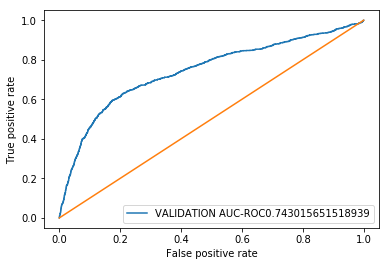

0.743015651518939


In [88]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,pred)
auc=roc_auc_score(y_test,pred)
plt.plot(fpr,tpr,label='VALIDATION AUC-ROC'+str(auc))
x=np.linspace(0,1,1000)
plt.plot(x,x,linestyle='-')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()
print(auc)

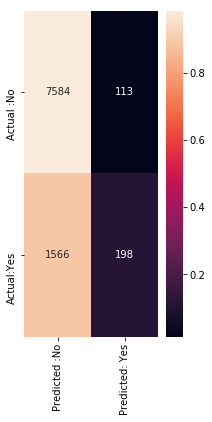

In [48]:
#confussion matrix
pred_val=model.predict(X_test)
cm=confusion_matrix(y_test,pred_val)
def plot_confussion_matrix(cm,normalized=True,cmap='bone'):
    plt.figure(figsize=[3,6])
    norm_cm=cm
    if normalized:
        norm_cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        sns.heatmap(norm_cm,annot=cm,fmt='g',xticklabels=['Predicted :No','Predicted: Yes'],yticklabels=['Actual :No','Actual:Yes'])
plot_confussion_matrix(cm,['No','Yes'])   

In [49]:
recall_score(y_test,pred_val)

0.11224489795918367

In [50]:
from sklearn.metrics import classification_report as rep
print(rep( y_test , pred_val ))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      7697
           1       0.64      0.11      0.19      1764

   micro avg       0.82      0.82      0.82      9461
   macro avg       0.73      0.55      0.55      9461
weighted avg       0.79      0.82      0.77      9461



## CROSS VALIDATION

In [70]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (train, test))
    
    print('train: %s, test: %s' % (data[train], data[test]))

train: [0 3 4 5], test: [1 2]
train: [0.10 0.40 0.50 0.60], test: [0.20 0.30]
train: [1 2 3 5], test: [0 4]
train: [0.20 0.30 0.40 0.60], test: [0.10 0.50]
train: [0 1 2 4], test: [3 5]
train: [0.10 0.20 0.30 0.50], test: [0.40 0.60]


In [82]:
#WE are using cross validation with limited data only some columns chosen from entire dataset
i=1
cv=[]
kf=StratifiedKFold(n_splits=5,random_state=12,shuffle=True)
for train,test in kf.split(df_base,Y):
    x_train,x_test=df_base.loc[train],df_base.loc[test]
    y_train,y_test=Y.loc[train],Y.loc[test]
    m=LogisticRegression()
    m.fit(x_train,y_train)
    pred=m.predict_proba(x_test)[:,1]
    pp=[]
    #converting probabilities in 0,1 uding threshold
    for j in pred:
        if j>0.5:
            pp.append(1)
        else:
            pp.append(0)
            
    predicted_values=pp
    roc_auc_sc=roc_auc_score(y_test,predicted_values)
    cv.append(roc_auc_sc)
    i+=1
print(cv)
print("Mean score is:" ,sum(cv)/len(cv))  
            
    

[0.5507844003699517, 0.5522307059911623, 0.5452277421816413, 0.543394440643625, 0.5459645164261188]
Mean score is: 0.5475203611224998


In [102]:
#Let convert above code in a function
def cv_score(model,features,target,split,thres):
    i=1
    cv=[]
    kf=StratifiedKFold(n_splits=split,random_state=12,shuffle=True)
    for train,test in kf.split(features,target):
        print('{} of kfold {}'.format(i,kf.n_splits))
        x_train,x_test=features.loc[train],features.loc[test]
        y_train,y_test=target.loc[train],target.loc[test]
        m=model
        m.fit(x_train,y_train)
        pred=m.predict_proba(x_test)[:,1]
        pp=[]
        #converting probabilities in 0,1 uding threshold
        for j in pred:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)

        predicted_values=pp
        roc_auc_sc=roc_auc_score(y_test,predicted_values)
        cv.append(roc_auc_sc)
        i+=1
        print('RocAuc score {} '.format(roc_auc_sc))
    
    return cv
    

In [112]:
baseline_model=cv_score(LogisticRegression(),df_base,Y,5,0.5) # Model with baseline columns

1 of kfold 5
RocAuc score 0.5507844003699517 
2 of kfold 5
RocAuc score 0.5522307059911623 
3 of kfold 5
RocAuc score 0.5452277421816413 
4 of kfold 5
RocAuc score 0.543394440643625 
5 of kfold 5
RocAuc score 0.5459645164261188 


## REVERSE FEATURE ELEMINATION

In [83]:
from sklearn.feature_selection import RFE

In [84]:
model= LogisticRegression()
rfe=RFE(model,n_features_to_select=1,step=1)
rfe.fit(df_base,Y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=1, step=1, verbose=0)

In [85]:
ranking_df=pd.DataFrame()
ranking_df['feature_name']=df_base.columns
ranking_df['Rank']=rfe.ranking_

In [86]:
ranked=ranking_df.sort_values(by=['Rank'])

In [87]:
ranked

,feature_name,Rank
2,current_month_balance,1
3,previous_month_balance,2
0,current_month_debit,3
7,occupation_self_employed,4
5,occupation_retired,5
1,previous_month_debit,6
8,occupation_student,7
6,occupation_salaried,8
4,vintage,9


In [118]:
important_features=ranked.iloc[0:6,0]
important_features

2       current_month_balance
3      previous_month_balance
0         current_month_debit
7    occupation_self_employed
5          occupation_retired
1        previous_month_debit
Name: feature_name, dtype: object

In [119]:
#let build a model with 5 most importnat ranked columns
ranked_model=cv_score(LogisticRegression(),df[important_features],Y,5,0.5)

1 of kfold 5
RocAuc score 0.5477164731271196 
2 of kfold 5
RocAuc score 0.5499623882437571 
3 of kfold 5
RocAuc score 0.5476695403054982 
4 of kfold 5
RocAuc score 0.5486653367452998 
5 of kfold 5
RocAuc score 0.5420767166182063 


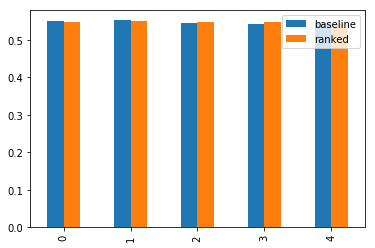

In [120]:
#let visualize differences between both models

results_df=pd.DataFrame({'baseline': baseline_model,'ranked':ranked_model})
results_df.plot(y=['baseline','ranked'],kind='bar')

## LOGISTIC REGRESSION FROM STATSMODELS

In [51]:
import statsmodels.api as sm

In [52]:
#From above we can take dependant and independant variables
""" 
df_base   #independant
Y                # dependant variable
"""

' \ndf_base   #independant\nY                # dependant variable\n'

In [53]:
x=sm.add_constant(X_train)
reg_log=sm.Logit(y_train,x)
res=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.432487
         Iterations 6


In [54]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                18921
Model:                          Logit   Df Residuals:                    18911
Method:                           MLE   Df Model:                            9
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                 0.09625
Time:                        15:11:40   Log-Likelihood:                -8183.1
converged:                       True   LL-Null:                       -9054.6
                                        LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.6815      0.616     -2.731      0.006      -2.888      -0.475
current_month_debit          0.4940      0.023     21.742      0.000       0.449       0.539
previous_month_debit         0.0985      0.022      4.460      0.000       0.055       0.142
current_month_balance       -1.4954      0.060    -25.058      0.000      -1.612      -1.378
previous_month_balance       1.1564      0.055     20.955      0.000       1.048       1.265
vintage                     -0.0001   1.32e-05    -10.094      0.000      -0.000      -0.000
occupation_retired           0.0838      0.620      0.135      0.892      -1.131       1.299
occupation_salaried          0.3242      0.616      0.527      0.598      -0.882       1.531
occupation_self_employed     0.4343      0.615      0.707      0.480      -0.771       1.639
occupation_student           0.1543      0.619      0.249      0.803      -1.060       1.368
============================================================================================
"""

In [55]:
np.set_printoptions(formatter={'float':lambda x:"{0:0.2f}".format(x)})
res.predict()

array([0.13, 0.14, 0.72, ..., 0.10, 0.15, 0.12])

In [56]:
np.array(Y)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [57]:
res.pred_table()

array([[15163.00, 262.00],
       [3096.00, 400.00]])

In [58]:
cm=pd.DataFrame(res.pred_table(),columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])

In [59]:
cm

,Predicted 0,Predicted 1
Actual 0,15163.0,262.0
Actual 1,3096.0,400.0


In [60]:
accuracy=(cm.iloc[0,0]+cm.iloc[1,1])/(cm.iloc[0,0]+cm.iloc[1,1]+cm.iloc[0,1]+cm.iloc[1,0])
accuracy

0.8225252365096982

In [61]:
#Testing the model

In [62]:
x=sm.add_constant(X_test)
reg_log_=sm.Logit(y_test,x)
result=reg_log_.fit()

Optimization terminated successfully.
         Current function value: 0.430925
         Iterations 7


In [63]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 9461
Model:                          Logit   Df Residuals:                     9451
Method:                           MLE   Df Model:                            9
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.1042
Time:                        15:11:41   Log-Likelihood:                -4077.0
converged:                       True   LL-Null:                       -4551.1
                                        LLR p-value:                2.583e-198
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.0321      1.129     -1.799      0.072      -4.246       0.181
current_month_debit          0.5665      0.033     17.148      0.000       0.502       0.631
previous_month_debit         0.1496      0.031      4.822      0.000       0.089       0.210
current_month_balance       -1.4561      0.085    -17.189      0.000      -1.622      -1.290
previous_month_balance       1.0818      0.079     13.748      0.000       0.928       1.236
vintage                     -0.0001   1.88e-05     -7.308      0.000      -0.000      -0.000
occupation_retired           0.7522      1.133      0.664      0.507      -1.468       2.972
occupation_salaried          0.6023      1.129      0.533      0.594      -1.611       2.816
occupation_self_employed     0.7850      1.128      0.696      0.487      -1.426       2.997
occupation_student           0.6842      1.133      0.604      0.546      -1.536       2.904
============================================================================================
"""

In [64]:
conf_matrix=pd.DataFrame(result.pred_table(),columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])

In [65]:
conf_matrix

,Predicted 0,Predicted 1
Actual 0,7555.0,142.0
Actual 1,1548.0,216.0


In [66]:
accuracy=(conf_matrix.iloc[0,0]+conf_matrix.iloc[1,1])/(conf_matrix.iloc[0,0]+conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]+conf_matrix.iloc[1,0])
accuracy

0.8213719479970405